In [99]:
import pandas as pd 
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt

The project's goal is to forecast the binary variable stroke. Within the dataset, there are 10 variables at our disposal for determining the likelihood of a stroke. Here are the independent variables along with their corresponding descriptions:

The columns: 

1.	ID: A unique number assigned to each individual.
2.	Gender: Indicates the gender of the individuals.
3.	Age: Represents the age of each individual.
4.	Hypertension: Indicates whether the person has a history of hypertension. It takes a value of 1 for yes and 0 for no.
5.	Ever_married: Indicates whether the individual has been married. It can be either "Yes" or "No".
6.	Work_type: Categorizes the individual's employment status into four categories: Private (working for a privately owned company), Self-employed, Government employee, has children,or Never worked.
7.	Smoking_status: Classifies the individual's smoking status into four categories: Formerly smoked, Never smoked, Smokes, and Unknown.
8.	BMI: Represents the Body Mass Index of each individual.
9.	Residence_type: Categorizes the individual's residence into two categories: Urban or Rural.
10.	Avg_glucose_level: Indicates the average glucose level of the individual.
11.	Stroke: Indicates whether the individual has a history of stroke. It takes a value of 1 for yes and 0 for no.

# DATA VALIDATION

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
duplicates = df.duplicated(subset = ['id','gender','age'])
duplicates.sum()

0

In [7]:
df['age'] = df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [8]:
df['age'].describe()

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [9]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

# Handling missing values

In [10]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

The Body Mass Index is calculated using this formula : BMI = weight (kg) / (height (m))^2 
BMI doesn't take  muscle mass or body composition into account. It's a measure used to asses the body weight relative to height. 

Individuals with a bmi below 18.5 are considered underweight. 


In [11]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003503,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003503,1.000000,0.276303,0.263668,0.238060,0.333738,0.245128
hypertension,0.003550,0.276303,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263668,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238060,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333738,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245128,0.127904,0.134914,0.131945,0.042374,1.000000


There is no significant correlation between the BMI variable and any other variables. Therefore, employing group-based imputation or regression imputation methods would not be meaningful. Considering that only approximately 4% of the records have missing values in the BMI column, it would be more reasonable to utilize median imputation instead of removing the entire column.

In [12]:
median_bmi = df['age'].median()
median_bmi

45.0

In [13]:
df['bmi']=df['bmi'].fillna(median_bmi)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


# Handling Outliers. 

<AxesSubplot:ylabel='bmi'>

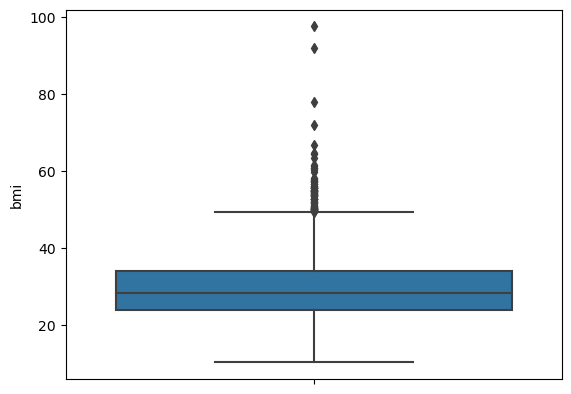

In [15]:
sns.boxplot(data = df,y=df['bmi'],whis=1.5)

<AxesSubplot:ylabel='age'>

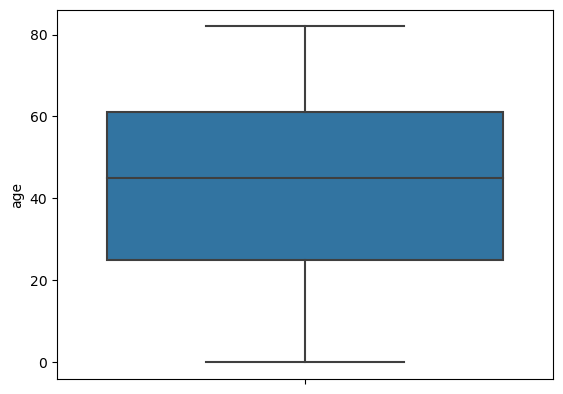

In [16]:
sns.boxplot(data = df,y=df['age'],whis=1.5)

<AxesSubplot:ylabel='avg_glucose_level'>

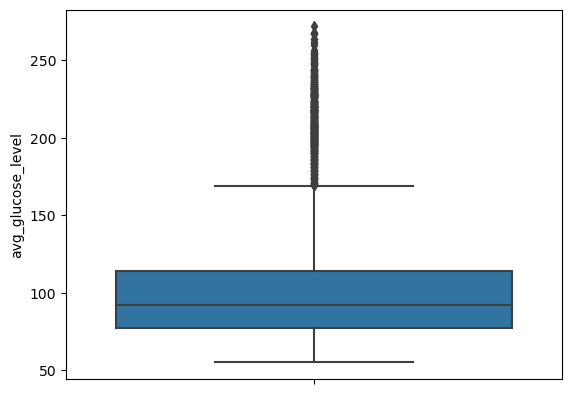

In [17]:
sns.boxplot(data = df,y=df['avg_glucose_level'],whis=1.5)

In [18]:
df['log_bmi'] = np.log(df['bmi'])
df['log_avg_glucose_level'] = np.log(df['avg_glucose_level'])

<AxesSubplot:ylabel='log_avg_glucose_level'>

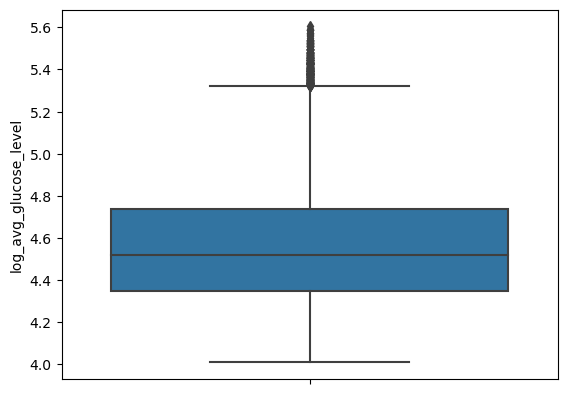

In [19]:
sns.boxplot(data = df,y=df['log_avg_glucose_level'],whis=1.5)

<Figure size 1000x1000 with 0 Axes>

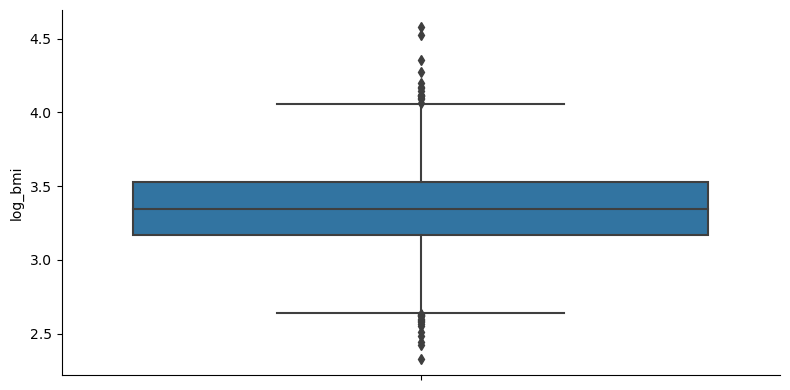

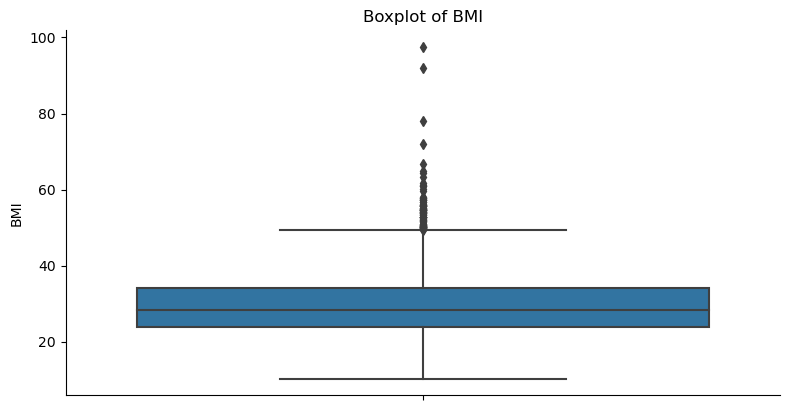

In [20]:
plt.figure(figsize=(10,10))
sns.catplot(data = df,y='log_bmi',whis=1.5,kind='box', height = 4, aspect = 2)
sns.catplot(data = df,y='bmi',whis=1.5,kind='box',height = 4, aspect=2) 

plt.gca().set_ylabel('Log BMI')
plt.gca().set_title('Boxplot of Log BMI')

plt.gca().set_ylabel('BMI')
plt.gca().set_title('Boxplot of BMI')

plt.show()

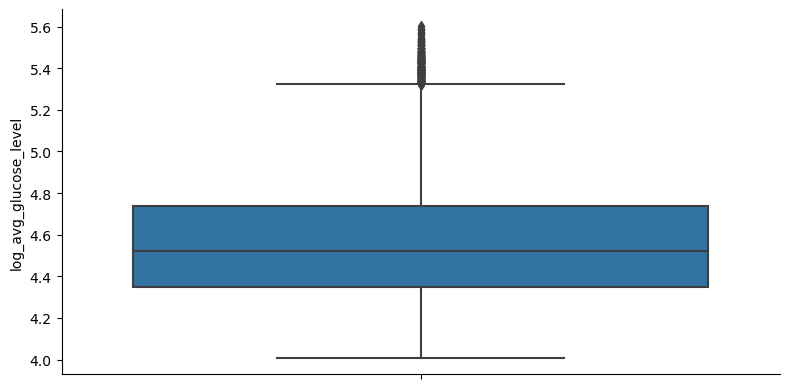

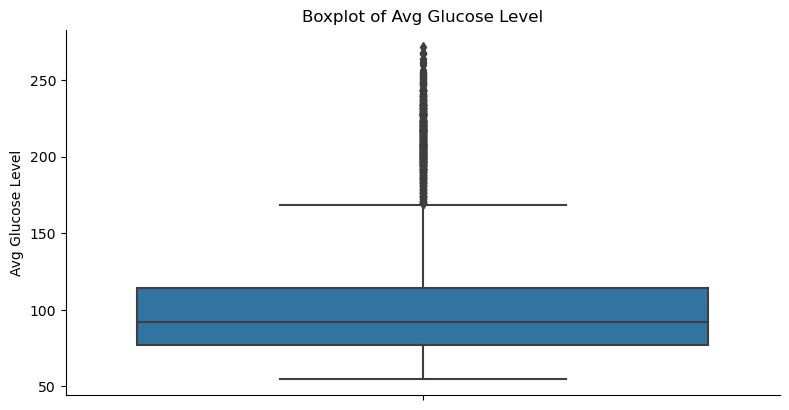

In [21]:
sns.catplot(data=df, y= 'log_avg_glucose_level',kind='box',height=4, aspect=2)
sns.catplot(data=df, y= 'avg_glucose_level',kind='box',height=4, aspect=2)


plt.ylabel("Log Avg Glucose Level")
plt.title("Boxplot of Log Avg Glucose Level")

plt.ylabel("Avg Glucose Level")
plt.title("Boxplot of Avg Glucose Level")


plt.show()

In [22]:
feature = df['bmi']
multiplier = 1.5

Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - multiplier*(IQR)
upper_bound = Q3 + multiplier*(IQR)


num_outliers = len(feature[(feature < lower_bound) | (feature > upper_bound)])
num_outliers

86

In [23]:
feature = df['log_bmi']
whis = 1.5

Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)
IQR = Q3 - Q1 

upper_bound = Q3 + whis*IQR
lower_bound = Q1 - whis*IQR

num_outlier  = len(feature[(feature < lower_bound) | (feature > upper_bound)])
num_outlier

31

In [24]:
feature = df['avg_glucose_level']
multiplier = 1.5

Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - multiplier*(IQR)
upper_bound = Q3 + multiplier*(IQR)


num_outliers = len(feature[(feature < lower_bound) | (feature > upper_bound)])
num_outliers

627

In [25]:
feature_glucose = df['log_avg_glucose_level']
multiplier = 1.5

Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - multiplier*(IQR)
upper_bound = Q3 + multiplier*(IQR)


num_outliers = len(feature_glucose[(feature_glucose < lower_bound) | (feature_glucose > upper_bound)])
num_outliers

5110

To identify outliers, I generated boxplots without including labels or formatting on the axes due to time constraints. The purpose was to quickly identify outliers. Through the boxplots, I observed outliers in the BMI and average glucose level data fields. To compare the number of outliers before and after logarithmic transformation, I applied natural logarithm to these data fields and displayed them vertically.

By applying logarithmic transformation, I successfully reduced the number of outliers. However, I made the decision not to remove any of these outliers, as these extreme values might hold predictive significance for the probability of a stroke. In a different project, it would have been appropriate to remove outliers to eliminate skewness and mitigate the risk of obtaining inaccurate results. 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5110 non-null   int64  
 1   gender                 5110 non-null   object 
 2   age                    5110 non-null   int64  
 3   hypertension           5110 non-null   int64  
 4   heart_disease          5110 non-null   int64  
 5   ever_married           5110 non-null   object 
 6   work_type              5110 non-null   object 
 7   Residence_type         5110 non-null   object 
 8   avg_glucose_level      5110 non-null   float64
 9   bmi                    5110 non-null   float64
 10  smoking_status         5110 non-null   object 
 11  stroke                 5110 non-null   int64  
 12  log_bmi                5110 non-null   float64
 13  log_avg_glucose_level  5110 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 559.0+ 

# Exploratory Data Analysis

In [27]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [28]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [29]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [30]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

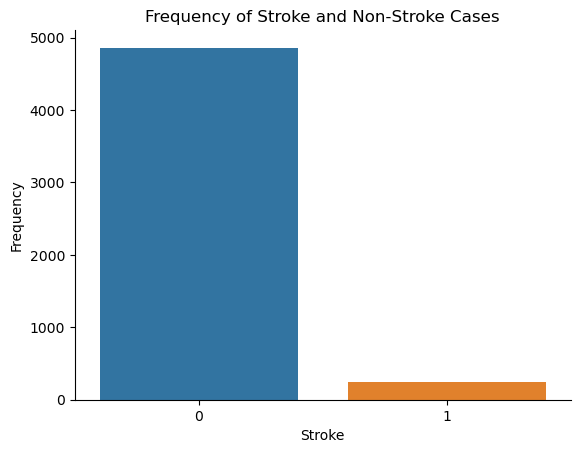

In [105]:
sns.countplot(data=df, x= 'stroke')
plt.title('Frequency of Stroke and Non-Stroke Cases')
sns.despine()
plt.ylabel('Frequency')
plt.xlabel('Stroke')

plt.show()

The dataset contains a relatively small number of individuals who experienced a stroke, specifically 249 cases. This limited sample size could pose a challenge when constructing a model that accurately predicts the probability of a stroke.

In [75]:
stroke = df[df['stroke']==1]
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_bmi,log_avg_glucose_level,work_cat,gender_num,ever_married_num
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3.600048,5.432367,4,1,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,45.0,never smoked,1,3.806662,5.309307,3,0,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.481240,4.662684,4,1,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3.538057,5.143008,4,0,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,3.178054,5.159745,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1,3.602777,4.442181,4,1,1
245,49669,Female,14,0,0,No,children,Rural,57.93,30.9,Unknown,1,3.430756,4.059235,1,0,0
246,27153,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,3.377588,4.366913,3,0,1
247,34060,Male,71,1,0,Yes,Self-employed,Rural,87.80,45.0,Unknown,1,3.806662,4.475062,3,1,1


In [77]:
stroke['ever_married_num'] = stroke['ever_married'].replace({'Yes':1,'No':0})

/var/folders/92/_kz_fht558b0hh0627_7zzk00000gn/T/ipykernel_52614/470079927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke['ever_married_num'] = stroke['ever_married'].replace({'Yes':1,'No':0})


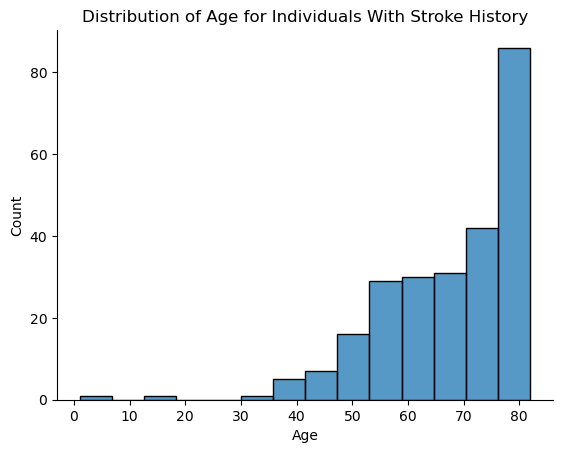

In [62]:
sns.histplot(data=stroke['age'])
plt.title('Distribution of Age for Individuals With Stroke History')
plt.xlabel('Age')
sns.despine()


plt.show()

The histogram depicts the distribution of age among individuals who have experienced a stroke. The majority of stroke cases are observed within the age group of 60 and above, while there are only a few instances of stroke among relatively young individuals. Based on these results, we can conclude that older individuals are more prone to suffering from strokes compared to younger people.

In [34]:
stroke['age'].value_counts()

78    21
80    17
79    17
81    14
57    11
76    10
68     9
74     9
63     9
82     9
77     8
59     8
71     7
58     7
72     6
61     6
70     6
75     6
54     6
69     6
66     4
60     4
51     4
73     4
65     3
64     3
50     3
39     3
49     3
56     3
45     3
67     3
55     2
38     2
53     2
48     2
52     2
47     1
43     1
42     1
1      1
46     1
32     1
14     1
Name: age, dtype: int64

In [35]:
stroke['age'].median()

71.0

In [113]:
age_bins = [0,20,40,60,90]
labels = ['0-20','20-40','40-60','60-90']

stroke['age_category'] = pd.cut(stroke['age'], bins = age_bins, labels=labels)

/var/folders/92/_kz_fht558b0hh0627_7zzk00000gn/T/ipykernel_52614/3778123989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke['age_category'] = pd.cut(stroke['age'], bins = age_bins, labels=labels)


In [114]:
stroke[['age','age_category']].head(20)

,age,age_category
0,67,60-90
1,61,60-90
2,80,60-90
3,49,40-60
4,79,60-90
5,81,60-90
6,74,60-90
7,69,60-90
8,59,40-60
9,78,60-90


In [115]:
stroke['age_category'].value_counts()

60-90    177
40-60     64
20-40      6
0-20       2
Name: age_category, dtype: int64

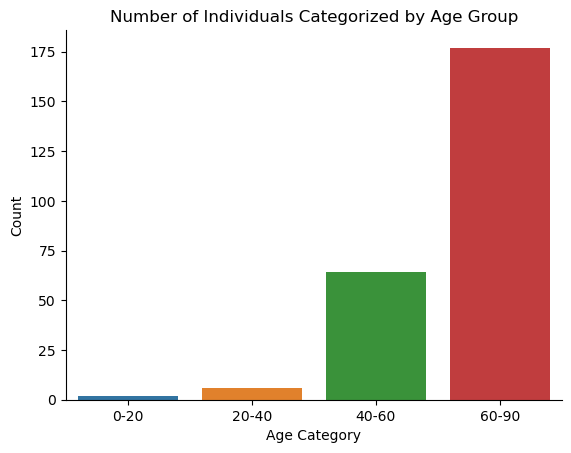

In [117]:
sns.countplot(data=stroke,x=stroke['age_category'])
plt.title('Number of Individuals Categorized by Age Group')
plt.xlabel('Age Category')
plt.ylabel('Count')
sns.despine()


plt.show()

Among individuals with a history of stroke, the age group with the highest frequency is 60-90 years. Out of the total individuals, 177, which accounts for approximately 71%, fall into this age range. On the other hand, there are only 8 instances of stroke recorded for individuals younger than 40 years.

Based on this information, we can deduce that a significant majority of individuals who have experienced a stroke are older than 60 years. Consequently, it can be inferred that older individuals are more susceptible to stroke compared to their younger counterparts.

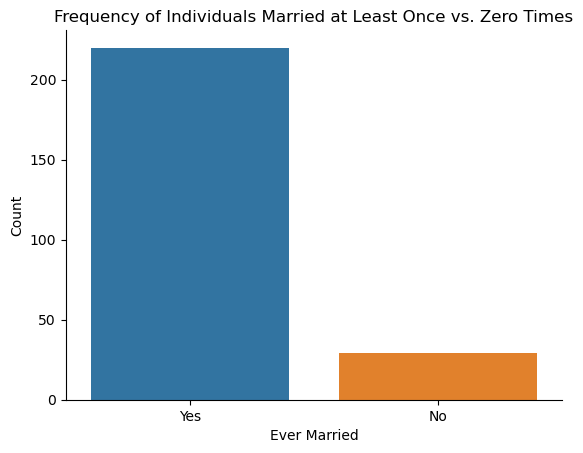

In [119]:
sns.countplot(data=stroke,x=stroke['ever_married'])
plt.title('Frequency of Individuals Married at Least Once vs. Zero Times')
plt.xlabel('Ever Married')
plt.ylabel('Count')
sns.despine()


plt.show()

The graph illustrates that out of the individuals with a history of stroke, 220 were married at some point in their lives, while only 29 were not married. These results may give the impression that married individuals are more prone to experiencing a stroke compared to those who have never been married. However, the truth behind this observation lies in the fact that married individuals tend to be older, and older individuals are more likely to encounter strokes.

It is important to consider that younger individuals have a lower risk of experiencing a stroke and are less likely to get married until their late twenties or early thirties. Therefore, the higher number of married individuals with strokes can be attributed to the age factor rather than a direct causation between marriage and stroke risk.

In [79]:
stroke['ever_married'].value_counts()

Yes    220
No      29
Name: ever_married, dtype: int64

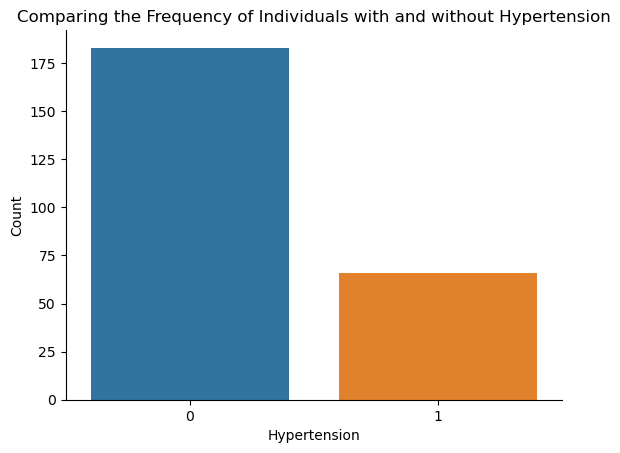

In [120]:
sns.countplot(data=stroke,x=stroke['hypertension'])
plt.title('Comparing the Frequency of Individuals with and without Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
sns.despine()


plt.show()

It appears that the majority of individuals who experienced a stroke in the dataset did not have a history of hypertension or high blood pressure. Based on this observation, it suggests that hypertension may not directly cause or significantly increase the probability of a stroke. However, it's important to note that this conclusion is drawn solely from the dataset at hand, and further analysis and research are required to fully understand the relationship between hypertension and stroke risk.

In [86]:
stroke['hypertension'].value_counts()

0    183
1     66
Name: hypertension, dtype: int64

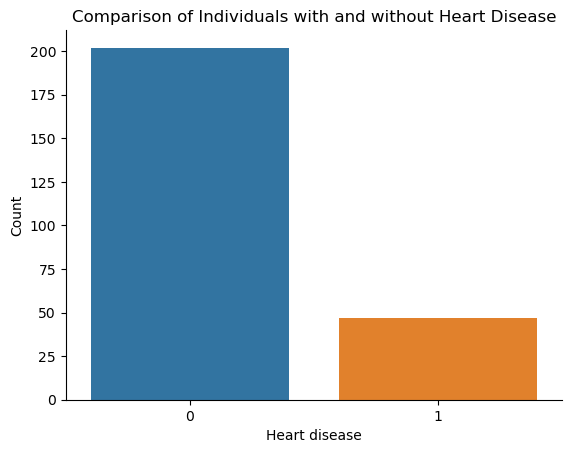

In [121]:
sns.countplot(data=stroke,x=stroke['heart_disease'])
plt.title('Comparison of Individuals with and without Heart Disease')
plt.xlabel('Heart disease')
plt.ylabel('Count')
sns.despine()


plt.show()

The overwhelming majority of individuals with a history of stroke in the dataset did not have a concurrent diagnosis of heart disease. This observation suggests that heart disease may not be a significant causal factor or contributor to the probability of experiencing a stroke. However, it is important to recognize that this conclusion is based on the dataset at hand, and further investigation and analysis would be necessary to fully understand the relationship between heart disease and stroke risk.

In [88]:
stroke['heart_disease'].value_counts()

0    202
1     47
Name: heart_disease, dtype: int64

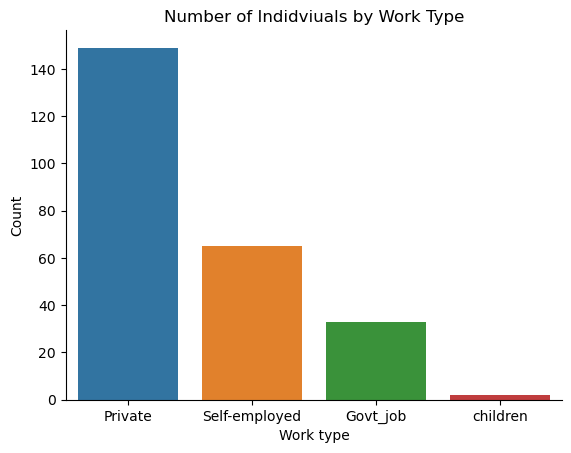

In [122]:
sns.countplot(data=stroke,x=stroke['work_type'])
plt.title('Number of Indidviuals by Work Type')
plt.xlabel('Work type')
plt.ylabel('Count')
sns.despine()


plt.show()

The majority of individuals who experienced a stroke in the dataset are employed in the private sector. There are 33 individuals working in government positions, and only 2 individuals with children who had a stroke. Additionally, 65 self-employed individuals also had a history of stroke. It is worth noting that the private sector is often characterized by high demands and increased job-related stress, which could potentially contribute to the occurrence of strokes. Similarly, self-employed individuals often face significant stress due to the nature of their work. The presence of these stressors in both types of employment could be a contributing factor to the increased likelihood of experiencing a stroke.

In [95]:
stroke['work_type'].value_counts()

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

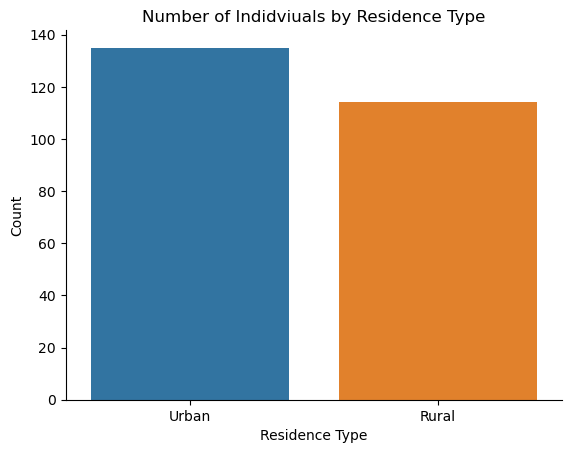

In [123]:
sns.countplot(data=stroke,x=stroke['Residence_type'])
plt.title('Number of Indidviuals by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
sns.despine()


plt.show()

The type of residence does not appear to have a significant impact on the probability of experiencing a stroke. The dataset indicates that the number of individuals living in urban and rural areas is nearly equal, suggesting that residing in either setting does not inherently increase the likelihood of a stroke.

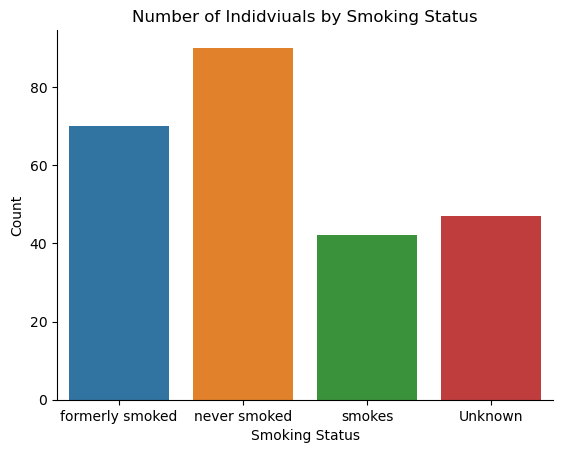

In [124]:
sns.countplot(data=stroke,x=stroke['smoking_status'])
plt.title('Number of Indidviuals by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
sns.despine()


plt.show()

Surprisingly, the majority of individuals who experienced a stroke in the dataset had never smoked in their lives. Out of the total number of individuals, 70 individuals reported a history of smoking, 42 were smokers at the time the data was collected, and information regarding smoking status was missing for 47 individuals. These findings suggest that smoking may not be a primary contributing factor to the occurrence of strokes in this dataset. However, it is important to note that further analysis and research are necessary to fully understand the relationship between smoking and stroke risk, considering other potential factors that may influence the results.

In [100]:
stroke['smoking_status'].value_counts()

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

# Getting the Model Ready to Predict Stroke

In [46]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [47]:
df['work_cat']  = df['work_type'].replace({'Never_worked':0,'children':1,'Govt_job':2,'Self-employed':3,
                                          'Private':4})

In [48]:
df[['work_cat','work_type']].head(30)

,work_cat,work_type
0,4,Private
1,3,Self-employed
2,4,Private
3,4,Private
4,3,Self-employed
5,4,Private
6,4,Private
7,4,Private
8,4,Private
9,4,Private


I  assigned a number to the different work types to create a numerical field that I can use to in my linear regression model. 

Never_worked : 0 
Children : 1 
Govt_job :2
Self-employed : 3
Private : 4

In [103]:
df['gender_num'] = df['gender'].replace({'Male':1,'Female':0})

I assigned a number to Male and Female to use the gender data field in my logistic regression model

Male: 1 
Female: 0

I assigned a number to Individuals who were married at some point in their lives. 

Yes: 1 
No: 0

In [50]:
df['ever_married_num'] = df['ever_married'].replace({'Yes':1,'No':0})

In [104]:
df_new=df.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status','log_bmi','log_avg_glucose_level'],axis=1)

In [52]:
df_new=df_new[df_new['gender_num']!='Other']

In [53]:
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_cat,gender_num,ever_married_num
0,67,0,1,228.69,36.6,1,4,1,1
1,61,0,0,202.21,45.0,1,3,0,1
2,80,0,1,105.92,32.5,1,4,1,1
3,49,0,0,171.23,34.4,1,4,0,1
4,79,1,0,174.12,24.0,1,3,0,1
...,...,...,...,...,...,...,...,...,...
5105,80,1,0,83.75,45.0,0,4,0,1
5106,81,0,0,125.20,40.0,0,3,0,1
5107,35,0,0,82.99,30.6,0,3,0,1
5108,51,0,0,166.29,25.6,0,4,1,1


# Build a Logistic Regression Model 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [55]:
X = df_new.drop('stroke',axis=1)
Y = df_new['stroke']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [57]:
logreg = LogisticRegression()

In [58]:
logreg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob 

array([0.00604748, 0.00824807, 0.02676909, ..., 0.02431545, 0.04887215,
       0.19665227])

In [60]:
y_pred = (y_pred_prob > 0.5).astype(int) 

In [61]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


You have successfully created a logistic regression model to predict the probability of a stroke. In the dataset, out of 5,109 individuals, only 249 individuals had a stroke, which accounts for approximately 5% of the dataset. 

Your logistic regression model demonstrated high accuracy by correctly predicting that an individual did not experience a stroke 94% of the time. The recall value of 1.00 indicates that all samples from the actual class 0 (no stroke) were correctly identified as such. 

Additionally, you calculated the F1-score, which is the harmonic mean of precision and recall. The F1-score of 0.97 indicates a high overall performance for class 0, considering both precision and recall. This suggests that your logistic regression model is performing well in identifying individuals who did not experience a stroke.

Overall, these evaluation metrics demonstrate the effectiveness of your logistic regression model in predicting the probability of a stroke and accurately classifying individuals without a stroke.



The logistic regression model had poor performance in predicting strokes. A precision value of 0 indicates that the model did not make any correct positive predictions for class 1 (stroke). Similarly, a recall value of 0 means that the model failed to correctly identify any of the actual positive cases of stroke.

These results suggest that the dataset is imbalanced and not representative of both classes, which hinders meaningful and accurate evaluation of the model. It is crucial to have a balanced and representative dataset to ensure reliable assessments of model performance.